In [1]:
import scanpy as sc
# import anndata as ad
import pandas as pd
import numpy as np
from scipy.sparse import issparse
import pickle
import seaborn as sns

data_file = "/users/acmaytin/csci2952g/final_project/data/raw_data.h5ad"

### Reading in Data with Scanpy

In [2]:
adata = sc.read_h5ad(data_file)

#### Batch Correction

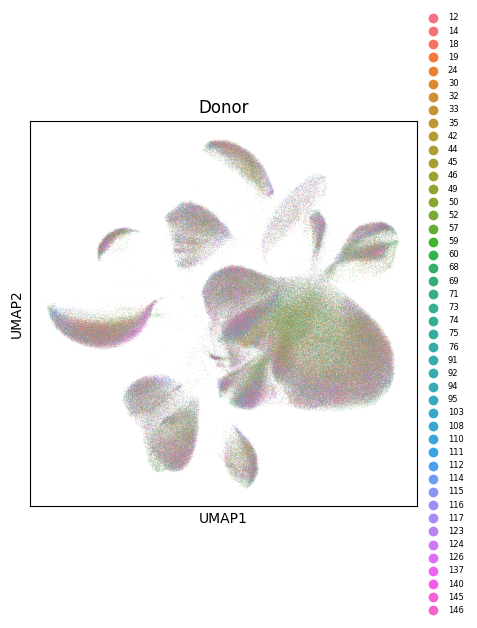

In [3]:
#code taken from https://support.parsebiosciences.com/hc/en-us/articles/7704577188500-How-to-analyze-a-1-million-cell-data-set-using-Scanpy-and-Harmony
def one_col_lgd(umap):
    legend = umap.legend(bbox_to_anchor=[1.00, 0.5],
    loc='center left', ncol=1, prop={'size': 6})
    legend.get_frame().set_linewidth(0.0)
    # for handle in legend.legendHandles:
    #     handle.set_sizes([25.0])
    return legend

donor_umap = sc.pl.umap(adata, color=['donor_id'],
show=False, palette=sns.color_palette("husl", 50),
    legend_fontsize=6, frameon=True, title='Donor')

lgd = one_col_lgd(donor_umap)

fig = donor_umap.get_figure()
fig.set_size_inches(5, 5)

In [5]:
sc.pp.regress_out(adata, keys='donor_id')

: 

: 

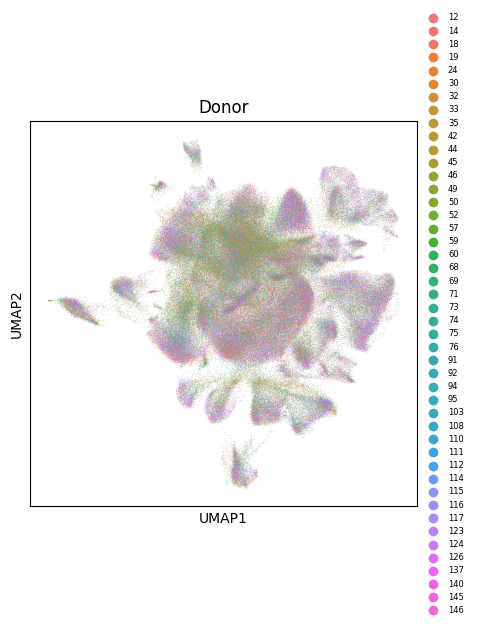

In [ ]:
donor_umap = sc.pl.umap(adata, color=['donor_id'],
show=False, palette=sns.color_palette("husl", 50),
    legend_fontsize=6, frameon=True, title='Donor')

lgd = one_col_lgd(donor_umap)

fig = donor_umap.get_figure()
fig.set_size_inches(5, 5)

In [20]:
with open("/users/acmaytin/csci2952g/final_project/data/batch_corrected_adata.pkl", "wb") as file:
    pickle.dump(adata, file)

In [3]:
print(adata)
print("Shape of adata.X:", adata.X.shape)
print("Length of adata.obs_names:", len(adata.obs_names))
print("Length of adata.var_names:", len(adata.var_names))

AnnData object with n_obs × n_vars = 424528 × 61427
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'Author_Annotation_colors', 'citation'

In [4]:
display(adata.obs.iloc[1])

APOE_class                                                   E3/E3
Brain.Region                                      Frontal Cx (BA9)
SORT                                                    All Nuclei
Braak.stage                                                     II
Disease.Group                                                  low
Amyloid                                                         No
Brain.weight                                                1480.0
PMI.hr.                                                       19.5
Race                                                           nan
Age                                                             61
RIN                                                            6.5
total_counts                                              2703.646
pct_counts_mt                                             0.565152
droplet_FDR                                                    0.0
doublefinder                                                  

In [18]:
display(adata.var.head())
#We only want protein coding genes (no pseudogenes, lncRNAs, etc.)
protein_coding_genes = adata.var[adata.var["feature_type"] == "protein_coding"]
print(f'There are {len(protein_coding_genes)} Protein Coding Genes')
selected_genes = protein_coding_genes.index
selected_gene_indices = adata.var_names.get_indexer(selected_genes)
hugo_names = protein_coding_genes['feature_name'].to_list()
print(f'Huge Gene Names: {hugo_names}')
print(f'Selected Gene Indices: {selected_gene_indices}')

,mt,ribo,hb,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSEMBLE GENE,,,,,,,,,
ENSG00000186827,False,False,False,False,TNFRSF4,NCBITaxon:9606,gene,1039,protein_coding
ENSG00000186891,False,False,False,False,TNFRSF18,NCBITaxon:9606,gene,789,protein_coding
ENSG00000160072,False,False,False,False,ATAD3B,NCBITaxon:9606,gene,3300,protein_coding
ENSG00000260179,False,False,False,False,ENSG00000260179.1,NCBITaxon:9606,gene,1558,lncRNA
ENSG00000234396,False,False,False,False,ENSG00000234396.3,NCBITaxon:9606,gene,326,lncRNA


There are 19993 Protein Coding Genes
Huge Gene Names: ['TNFRSF4', 'TNFRSF18', 'ATAD3B', 'PRDM16', 'ACAP3', 'PUSL1', 'PEX10', 'CPTP', 'SKI', 'MEGF6', 'TAS1R3', 'ERRFI1', 'PEX14', 'PLCH2', 'SPSB1', 'LZIC', 'ENSG00000285629.1', 'HES3', 'SLC2A5', 'ENO1', 'PLEKHM2', 'B3GALT6', 'DHRS3', 'CA6', 'LRRC38', 'NMNAT1', 'PRAMEF18', 'CCDC27', 'CHD5', 'VAMP3', 'DISP3', 'CLSTN1', 'MMEL1', 'SCNN1D', 'TMEM51', 'C1orf127', 'TTLL10', 'TPRG1L', 'FBXO42', 'C1QTNF12', 'ALDH4A1', 'RERE', 'CLCN6', 'TTC34', 'PRAMEF2', 'PRAMEF4', 'CELA2A', 'CELA2B', 'SPEN', 'RER1', 'PANK4', 'WRAP73', 'VPS13D', 'HTR6', 'ARHGEF16', 'RBP7', 'PRAMEF13', 'GPR157', 'ZBTB40', 'MICOS10-NBL1', 'FBXO44', 'PRAMEF10', 'PRAMEF11', 'PRAMEF1', 'NPHP4', 'TMEM201', 'MTOR', 'TP73', 'ANGPTL7', 'HES5', 'PARK7', 'PRAMEF6', 'CLIC4', 'GPR3', 'UQCRHL', 'CD164L2', 'SZRD1', 'PDIK1L', 'CAMTA1', 'NECAP2', 'ZNF593OS', 'FBXO6', 'LAPTM5', 'SLC30A2', 'PHACTR4', 'CNKSR1', 'FAM110D', 'ICMT', 'WASF2', 'MED18', 'SLC9A1', 'LDLRAP1', 'ATP5IF1', 'SDC3', 'PAFAH2', 'WD

In [21]:
exp_data = adata.X
if issparse(exp_data):
    expression_df = pd.DataFrame.sparse.from_spmatrix(exp_data, index=adata.obs_names, columns=adata.var['feature_name'])
    protein_coding_exp_df = expression_df.iloc[:, selected_gene_indices]
    display(protein_coding_exp_df)

feature_name,TNFRSF4,TNFRSF18,ATAD3B,PRDM16,ACAP3,PUSL1,PEX10,CPTP,SKI,MEGF6,...,ENSG00000276017.1,ENSG00000277630.4,ENSG00000278384.1,ENSG00000278633.1,ENSG00000276345.1,ENSG00000275063.1,ENSG00000277856.1,ENSG00000271254.7,ENSG00000268674.2,ENSG00000277475.1
AGTACCATCCATCTGC-C0060,0,0,1.057686,1.340132,0,0,0,0,0.66261,0,...,0,0,0,0,0,0,0,0,0,0
ACATCAGTCTTTAGTC-C0018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCAATCCAGAATAGGG-C0018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTAGCCTAGCGTTTAC-C0018,0,0,0,0,1.777323,1.777323,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTGAAACGTCCCTACT-C0018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTACCTGGCACA-D0011,0,0,1.474597,0,1.177479,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCCTGTGCCGGG-D0203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTCTAGTGTCACTACA-C0081,0,0,0,0,0,0,0,0,0,0,...,0,0,1.200994,0,0,0,0,0,0,0
CATCGTCCATCTCCCA-C0105,0,0,0,0,0,0,0,0,0.896737,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_metadata = adata.obs[["disease", "cell_type", "Braak.stage"]] 
df_final = df_metadata.join(protein_coding_exp_df)
display(df_final)

,disease,cell_type,Braak.stage,TNFRSF4,TNFRSF18,ATAD3B,PRDM16,ACAP3,PUSL1,PEX10,...,ENSG00000276017.1,ENSG00000277630.4,ENSG00000278384.1,ENSG00000278633.1,ENSG00000276345.1,ENSG00000275063.1,ENSG00000277856.1,ENSG00000271254.7,ENSG00000268674.2,ENSG00000277475.1
AGTACCATCCATCTGC-C0060,Alzheimer disease,astrocyte,IV,0,0,1.057686,1.340132,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACATCAGTCTTTAGTC-C0018,normal,astrocyte,II,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCAATCCAGAATAGGG-C0018,normal,astrocyte,II,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTAGCCTAGCGTTTAC-C0018,normal,astrocyte,II,0,0,0,0,1.777323,1.777323,0,...,0,0,0,0,0,0,0,0,0,0
CTGAAACGTCCCTACT-C0018,normal,astrocyte,II,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTACCTGGCACA-D0011,normal,GABAergic neuron,II,0,0,1.474597,0,1.177479,0,0,...,0,0,0,0,0,0,0,0,0,0
GCCTGTGCCGGG-D0203,normal,GABAergic neuron,I,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTCTAGTGTCACTACA-C0081,Alzheimer disease,GABAergic neuron,V,0,0,0,0,0,0,0,...,0,0,1.200994,0,0,0,0,0,0,0
CATCGTCCATCTCCCA-C0105,Alzheimer disease,GABAergic neuron,IV,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
num_cell_types = adata.obs['cell_type'].value_counts()
display(num_cell_types)

num_diseased = adata.obs['disease'].value_counts()
display(num_diseased)

stages_num = adata.obs['Braak.stage'].value_counts()
display(stages_num)

cell_type
glutamatergic neuron              282930
GABAergic neuron                   79294
oligodendrocyte                    36589
astrocyte                          14691
oligodendrocyte precursor cell      5770
microglial cell                     5071
blood vessel endothelial cell        183
Name: count, dtype: int64

disease
Alzheimer disease    310773
normal               113755
Name: count, dtype: int64

Braak.stage
VI     127977
IV      93806
II      70653
III     34861
V       34393
0       32041
I       30797
Name: count, dtype: int64

In [7]:
ad_obj = adata.obs[adata.obs['disease'] == 'Alzheimer disease']
norm_obj = adata.obs[adata.obs['disease'] == 'normal']

num_cell_types = ad_obj['cell_type'].value_counts()
display(num_cell_types)

num_cell_types = norm_obj['cell_type'].value_counts()
display(num_cell_types)

# num_diseased = norm_obj['disease'].value_counts()
# display(num_diseased)

# stages_num = adata.obs['Braak.stage'].value_counts()
# display(stages_num)

cell_type
glutamatergic neuron              207990
GABAergic neuron                   54479
oligodendrocyte                    28222
astrocyte                          11346
oligodendrocyte precursor cell      4311
microglial cell                     4282
blood vessel endothelial cell        143
Name: count, dtype: int64

cell_type
glutamatergic neuron              74940
GABAergic neuron                  24815
oligodendrocyte                    8367
astrocyte                          3345
oligodendrocyte precursor cell     1459
microglial cell                     789
blood vessel endothelial cell        40
Name: count, dtype: int64

### Split into Separate Datasets

#### Glutamatergic Neuron (282,930)

In [37]:
glut_rows = adata.obs[adata.obs["cell_type"] == "glutamatergic neuron"]
# display(glut_rows)
glut_row_idx = glut_rows.index
print(glut_row_idx)

Index(['AAACCTGAGCGAAGGG-C0017', 'AAACCTGCAAGTTCTG-C0017',
       'AAACCTGGTGAGGGAG-C0017', 'AAACCTGGTGTATGGG-C0017',
       'AAACCTGGTTGAGTTC-C0017', 'AAACGGGAGAAGAAGC-C0017',
       'AAACGGGGTAAATGTG-C0017', 'AAAGATGCAAACTGTC-C0017',
       'AAAGATGCAACGATCT-C0017', 'AAAGATGCATGGTCAT-C0017',
       ...
       'TGTCCAATGGAT-D0200', 'TGTCTGATACGT-D0200', 'TTAGGCCTTTGT-D0200',
       'TTCCGCGATTAA-D0200', 'TTGCTACTTAGC-D0200', 'TTGTCGTGATGC-D0200',
       'TTTGAGTAGACG-D0200', 'TTTGCCCCTTTG-D0200', 'TTTGGATGACCC-D0200',
       'TTTGGTAGTTTA-D0200'],
      dtype='object', length=282930)


In [36]:
glut_neur_df = df_final.loc[glut_row_idx, :]
display(glut_neur_df)

,disease,cell_type,Braak.stage,TNFRSF4,TNFRSF18,ATAD3B,PRDM16,ACAP3,PUSL1,PEX10,...,ENSG00000276017.1,ENSG00000277630.4,ENSG00000278384.1,ENSG00000278633.1,ENSG00000276345.1,ENSG00000275063.1,ENSG00000277856.1,ENSG00000271254.7,ENSG00000268674.2,ENSG00000277475.1
AAACCTGAGCGAAGGG-C0017,normal,glutamatergic neuron,II,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCAAGTTCTG-C0017,normal,glutamatergic neuron,II,0,0,1.068354,0,1.068354,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGGTGAGGGAG-C0017,normal,glutamatergic neuron,II,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGGTGTATGGG-C0017,normal,glutamatergic neuron,II,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGGTTGAGTTC-C0017,normal,glutamatergic neuron,II,0,0,1.213067,0,1.514177,0.780193,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTCGTGATGC-D0200,Alzheimer disease,glutamatergic neuron,VI,0,0,0.988604,0,1.475897,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGAGTAGACG-D0200,Alzheimer disease,glutamatergic neuron,VI,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGCCCCTTTG-D0200,Alzheimer disease,glutamatergic neuron,VI,0,0.782763,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGATGACCC-D0200,Alzheimer disease,glutamatergic neuron,VI,0,0,0,0,0,0,2.571994,...,0,0,0,0,0,0,0,0,0,0


#### GABAergic Neuron (79,294)

In [50]:
GABA_rows = adata.obs[adata.obs["cell_type"] == "GABAergic neuron"]
GABA_row_idx = GABA_rows.index
print(GABA_row_idx)
GABA_neur_df = df_final.loc[GABA_row_idx, :]

Index(['AAACCTGAGTTCGCAT-C0017', 'AAACCTGGTAGGGTAC-C0017',
       'AAACCTGGTCCTAGCG-C0017', 'AAACGGGGTACGCACC-C0017',
       'AAAGATGAGAGCTATA-C0017', 'AAAGATGCACTATCTT-C0017',
       'AAAGCAAGTGCATCTA-C0017', 'AAAGCAATCTTTAGTC-C0017',
       'AAAGTAGCAACACCTA-C0017', 'AAAGTAGTCAGCTCTC-C0017',
       ...
       'AGCTACATCGAGTGGA-C0084', 'TAAGCCAGTTACCTGA-C0084',
       'CCGGTGACACCGTGAC-C0086', 'AGCATCAGTCCGGATC-C0099',
       'AAAGGTACAACTGATC-C0108', 'CTACCTGGCACA-D0011', 'GCCTGTGCCGGG-D0203',
       'TTCTAGTGTCACTACA-C0081', 'CATCGTCCATCTCCCA-C0105',
       'CCATGCGGAATT-D0082'],
      dtype='object', length=79294)


#### Oligodendrocyte (36,589)

In [54]:
oli_rows = adata.obs[adata.obs["cell_type"] == "oligodendrocyte"]
oli_row_idx = oli_rows.index
print(oli_row_idx)
oligo_df = df_final.loc[oli_row_idx, :]

Index(['AAACCTGAGTACGATA-C0018', 'AACCATGGTAAATGTG-C0018',
       'AACTTTCCATATGGTC-C0018', 'ACCTTTAAGCACACAG-C0018',
       'ACCTTTAGTGTTAAGA-C0018', 'ACGAGCCCACCGTTGG-C0018',
       'ACTATCTGTGACTCAT-C0018', 'ATCCGAATCTTCCTTC-C0018',
       'CACAAACTCTTGCATT-C0018', 'CATCAAGTCCTCAATT-C0018',
       ...
       'AACCTGGTCCCT-D0154', 'CATAATCATCTG-D0154', 'AAGACCCTCAGG-D0163',
       'AGCCTGCTAAGG-D0163', 'AGACTGCCAAAA-D0171', 'TCCTGGGGCACC-D0171',
       'GAATTTGGTGAC-D0198', 'CCCGCGGAAATA-D0200', 'GAAACTCGCTAC-D0200',
       'TTCCTATATTTA-D0206'],
      dtype='object', length=36589)


#### Astrocyte (14,691)

In [55]:
ast_rows = adata.obs[adata.obs["cell_type"] == "astrocyte"]
ast_row_idx = ast_rows.index
print(ast_row_idx)
astro_df = df_final.loc[ast_row_idx, :]

Index(['AGTACCATCCATCTGC-C0060', 'ACATCAGTCTTTAGTC-C0018',
       'CCAATCCAGAATAGGG-C0018', 'CTAGCCTAGCGTTTAC-C0018',
       'CTGAAACGTCCCTACT-C0018', 'AAATGCCGTGCGAAAC-C0023',
       'AAGGAGCTCAGCAACT-C0023', 'AGCTCCTCACCGAAAG-C0023',
       'AGGTCCGCAATAAGCA-C0023', 'CACAGTATCACTATTC-C0023',
       ...
       'AATGTGACCATT-D0204', 'CTCGATTCTGGG-D0204', 'GAGTTCGGCTCC-D0204',
       'GGGCGAGGTGCT-D0204', 'TGAGCGTTCGCT-D0204', 'AACTTCCCGCCG-D0206',
       'AGAAGGACTGCT-D0206', 'GCTTATGTTGGG-D0206', 'CTATAGGGTTCGGTAT-C0107',
       'TTCGATTTCTGC-D0082'],
      dtype='object', length=14691)


#### Microglial cell (5,071)

In [58]:
mic_rows = adata.obs[adata.obs["cell_type"] == "microglial cell"]
mic_row_idx = mic_rows.index
print(mic_row_idx)
micro_df = df_final.loc[mic_row_idx, :]

Index(['CGAGCCATCAGTTCGA-C0017', 'ACGCCAGAGAGCCCAA-C0024',
       'CGTCACTTCCCGACTT-C0030', 'AGAGCTTGTCCATGAT-C0037',
       'AGCTTGACAGGGAGAG-C0037', 'CTCGGAGAGCCCAACC-C0040',
       'CTGAAACTCGTACGGC-C0040', 'GCAATCACAAACAACA-C0040',
       'GCTGCAGTCATTGCCC-C0040', 'AGTTCGACAACAGCCC-C0058',
       ...
       'CCATGAAACCAG-D0202', 'CTTAAACATGTC-D0202', 'AGCTCGGGTACG-D0204',
       'ATCGGAAAATCG-D0204', 'GGCCACCTGTTG-D0204', 'GTCGGGCAGCTA-D0204',
       'TGGTGATGCGAG-D0204', 'AACACCTCATGG-D0206', 'ATGCCGCAAGGC-D0206',
       'TTTCCCGCACCG-D0206'],
      dtype='object', length=5071)


### Save Datasets

In [60]:
glut_neur_df.to_pickle("/users/acmaytin/csci2952g/final_project/data/cell_type_pkl_files/glutamatergic.pkl")
GABA_neur_df.to_pickle("/users/acmaytin/csci2952g/final_project/data/cell_type_pkl_files/GABAergic.pkl")
oligo_df.to_pickle("/users/acmaytin/csci2952g/final_project/data/cell_type_pkl_files/oligodendrocyte.pkl")
astro_df.to_pickle("/users/acmaytin/csci2952g/final_project/data/cell_type_pkl_files/astrocyte.pkl")
micro_df.to_pickle("/users/acmaytin/csci2952g/final_project/data/cell_type_pkl_files/microglial.pkl")